In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6,6

In [46]:
import time
import numpy as np

t = time.time()

N = 1000000
x = np.zeros(N).astype(int)
x[0] = 1
x[1] = 1

p = 0
while( p < np.sqrt(N)):
    p = p + 1
    while(x[p] == 1):
        p += 1
    x[2*p::p] = 1
    
P = np.where(x == 0)[0]

for k in 1+np.arange(100-1):
    print k,
    x = np.zeros(N).astype(int)
    for p in P[P < np.sqrt((k+1)*N)]:
        if( (k*N)% p == 0):
            x[0] = 1
        x[ p - (k*N % p)::p] = 1

    P = np.hstack((P, np.where(x == 0)[0] + k*N))

print time.time() - t
P.shape

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 4.87110519409


(5761455,)

In [47]:
n = P[10002]

t = time.time()

N = [ (x,y,z)
 for x in range(int(np.sqrt(n))+1) 
 for y in range(int(np.sqrt(n - x**2))+1) 
 for z in range(int(np.sqrt(n - x**2 - y**2))+1) 
 if n - x**2 - y**2 - z**2 == 0 ]

N = np.array(N)
print N

print time.time() - t

[[  0 180 269]
 [  0 269 180]
 [  8  96 309]
 ..., 
 [316  69  12]
 [318  39  46]
 [318  46  39]]
18.965512991


In [27]:
n % 8

7

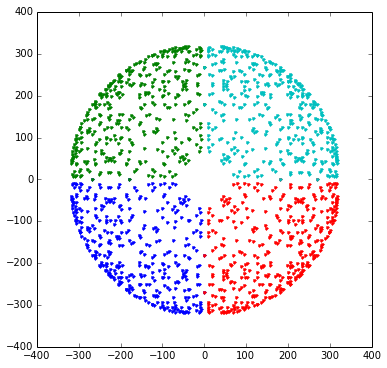

In [41]:
N = np.array(N)




A = np.array([[1,0,0],[0,1,0],[0,0,1]])

P = np.array([[1,0,0],[0,1,0]])

M = np.dot(N,P.T)

for (a,b) in [(x,y) for x in [-1,1] for y in [-1,1]]:
    plt.plot(a*M[:,0], b*M[:,1], '.')

In [44]:
Q = [1]

def f(Q):
    Q += [1]
    
for t in range(10):
    f(Q)
    
Q

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [55]:
# How to apply dynamic programming?  
# How can we compute N - x^2 = y^2 + z^2 in terms of smaller values of N - x^2 = y^2 + z^2?

n = P[10002]

t = time.time()

def f(x):
    return [(x,y,z) for y in range(int(np.sqrt(n - x**2))+1) 
            for z in range(int(np.sqrt(n - x**2 - y**2))+1) 
            if n - x**2 - y**2 - z**2 == 0 ]

N = [ z  for x in range(int(np.sqrt(n))+1) for z in f(x)]



N = np.array(N)
print N

print time.time() - t

[[  0 180 269]
 [  0 269 180]
 [  8  96 309]
 ..., 
 [316  69  12]
 [318  39  46]
 [318  46  39]]
15.3920800686
